In [15]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [16]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup

In [29]:
def crawlWiki(alist, seed, max, step):
  #open and read the page
  openurl = urlopen(seed)
  obj = soup(openurl.read())

  #get all links in current page
  templist = []
  for link in obj.findAll('a',):
    if 'href' in link.attrs:
      #only add link that hasn't been in the list
      if link.attrs['href'] not in alist:
        templist.append(link.attrs['href'])

  alist.extend(templist)
  #step to the next url in the list if not already max

  print("from " + seed + " getting " + str(len(templist))+ " ")

  if step < max:
    for alink in templist:
        aurl = "https://news.detik.com/berita" + templist.pop(0)
        print("going to: " + aurl)
        alist.extend(crawlWiki(alist, aurl, max, step+1))
  return alist

In [17]:
url = 'https://news.detik.com/berita'
opener = urlopen(url)
obj = soup(opener.read())

In [28]:
links = obj.findAll('article', {'class': 'ph_newsfeed_d article_inview list-content__item'})

titles = []
news_body = []
urls = []
images = []

for link in links:
    news = link.find('a')
    news_body = news.findAll('div')
    titles.append(news.attrs['dtr-ttl'])
    urls.append(news.attrs['href'])
    images.append(link.attrs['i-img'])
    print(news_body)

[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]
[<div class="ai_img ph-picture"></div>]


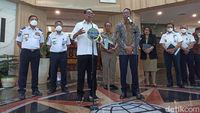

In [19]:
from PIL import Image

img = Image.open(urlopen(images[0]))
display(img)

In [21]:
import pandas as pd
data = {
    'Title': titles,
    'Images': images,
    'Link': urls
       }

df = pd.DataFrame(data)
df.head()

,Title,Images,Link
0,"Heru Budi Bertemu Menhub, Bahas Angkutan Massa...",https://akcdn.detik.net.id/community/media/vis...,https://news.detik.com/berita/d-6365505/heru-b...
1,Dinkes Tangsel Temukan 1 Kasus Gagal Ginjal Ak...,https://akcdn.detik.net.id/community/media/vis...,https://news.detik.com/berita/d-6365488/dinkes...
2,DLH Kabupaten Bogor Minta Kecamatan-Desa Aktif...,https://akcdn.detik.net.id/community/media/vis...,https://news.detik.com/berita/d-6365480/dlh-ka...
3,Bamsoet Apresiasi Kesiapan Polri dan BIN Amank...,https://akcdn.detik.net.id/community/media/vis...,https://news.detik.com/berita/d-6365465/bamsoe...
4,KPK Panggil Ulang Wabup Mamberamo Tengah Terka...,https://akcdn.detik.net.id/community/media/vis...,https://news.detik.com/berita/d-6365462/kpk-pa...
